<a href="https://colab.research.google.com/github/yshivamcodes/Loan-Approval-Prediction/blob/main/Loan_Approval_Prediction_alfidotech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


loading dataset


In [ ]:
df = pd.read_csv('loan_prediction.csv')
print("Initial Data Shape:", df.shape)
print(df.head())

Initial Data Shape: (614, 13)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural     

data cleaning and preprocessing


In [ ]:
# Check for nulls
print("\nMissing values:\n", df.isnull().sum())

# Impute missing values
# Drop Loan_ID if exists
if 'Loan_ID' in df.columns:
    df.drop('Loan_ID', axis=1, inplace=True)

cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


# Encode categorical variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


Missing values:
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


/tmp/ipython-input-6-2472970894.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


EDA

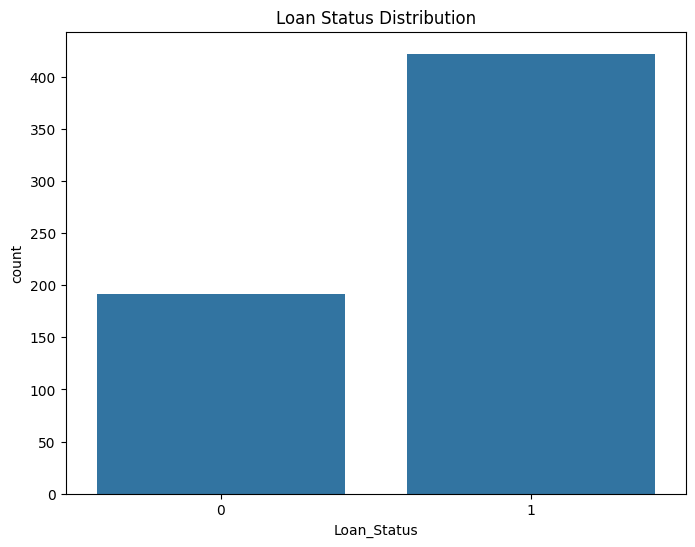

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

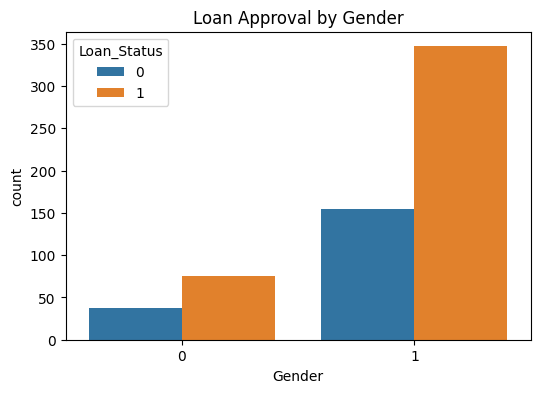

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title("Loan Approval by Gender")
plt.show()

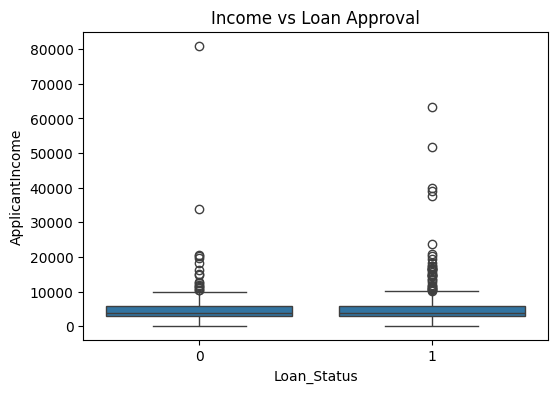

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title("Income vs Loan Approval")
plt.show()

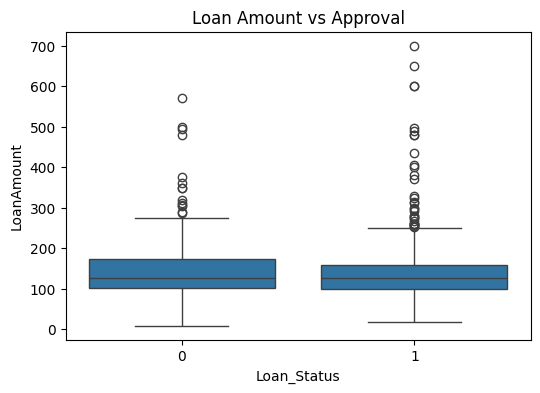

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title("Loan Amount vs Approval")
plt.show()

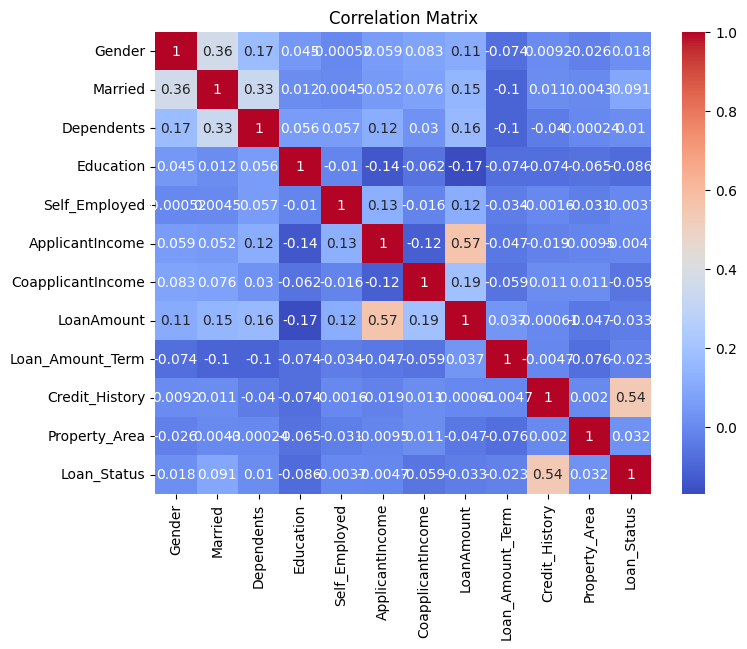

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

implementing random forest


In [ ]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)# Step 8: Model Evaluation
y_pred = model.predict(X_test_scaled)

In [ ]:
y_pred = model.predict(X_test_scaled)

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.7479674796747967

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.42      0.54        43
           1       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123


Confusion Matrix:
 [[18 25]
 [ 6 74]]


In [ ]:
sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print("\nSample Prediction:", prediction)


Sample Prediction: [1]


implementing logstic regression


In [ ]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:

# Evaluation
y_pred = lr_model.predict(X_test_scaled)
y_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Confusion Matrix:
 [[18 25]
 [ 1 79]]


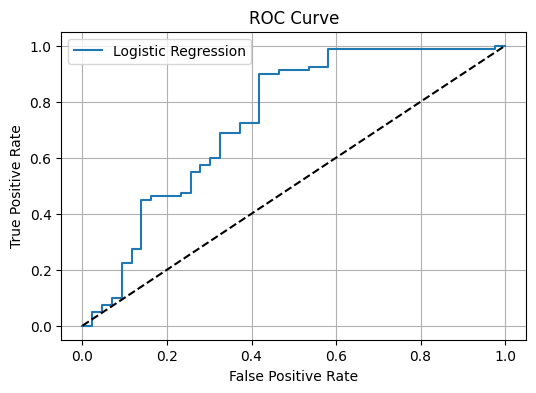


ROC AUC Score: 0.7386627906976744


In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

feature importance coefficient and plot


Top Influential Features:
              Feature  Coefficient
9     Credit_History     1.310881
1            Married     0.313116
7         LoanAmount    -0.176504
3          Education    -0.159361
6  CoapplicantIncome    -0.152199


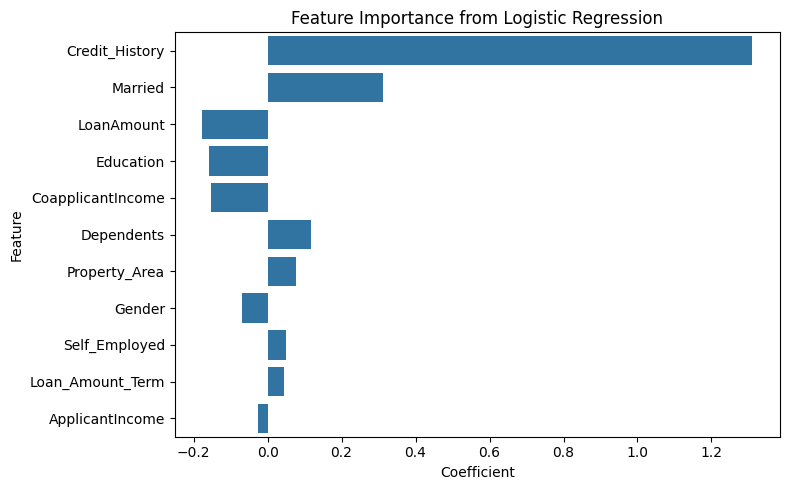

In [ ]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop Influential Features:\n", importance.head())

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=importance)
plt.title("Feature Importance from Logistic Regression")
plt.tight_layout()
plt.show()